# Modelos de Regresión Lineal
## Modelo con datos simulados
* y = a + b * x
* x : 100 valores distribuidos según una N(1.5,2.5)
* ye = 5 + 1.9 * x + e
* e estará distribuido según N(0, 0.8)

In [1]:
import pandas as pd
import numpy as np

In [2]:
x = 1.5 + 2.5 * np.random.randn(100)

In [3]:
res = 0 + 0.8 * np.random.randn(100)

In [4]:
y_pred = 5 + 1.9 * x 

In [5]:
y_act = 5 + 1.9 * x + res

In [6]:
x_list = x.tolist()
y_pred_list = y_pred.tolist()
y_act_list = y_act.tolist()

In [7]:
data = pd.DataFrame(
        {
            'x': x_list,
            'y_actual': y_act_list,
            'y_prediccion': y_pred_list
        }
)

In [8]:
data.head()

,x,y_actual,y_prediccion
0,3.336319,12.605756,11.339006
1,4.128108,14.127541,12.843405
2,-1.809090,2.234599,1.562730
3,0.148071,5.378211,5.281334
4,-1.258617,1.198683,2.608628


In [9]:
import matplotlib.pyplot as plt

In [10]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

Text(0.5, 1.0, 'Valor Actual vs Predicción')

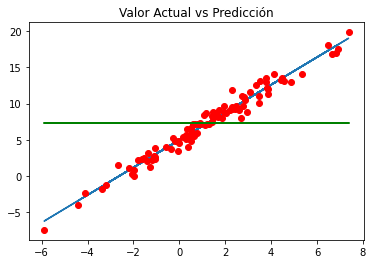

In [11]:
%matplotlib inline 
plt.plot(x,y_pred)
plt.plot(x,y_act, "ro")
plt.plot(x,y_mean, "g")
plt.title("Valor Actual vs Predicción")

In [12]:
data["SSR"]=(data["y_prediccion"]-np.mean(y_act))**2
data["SSD"]=(data["y_prediccion"]-data["y_actual"])**2
data["SST"]=(data["y_actual"]-np.mean(y_act))**2

In [13]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST
0,3.336319,12.605756,11.339006,15.858701,1.604655,27.552507
1,4.128108,14.127541,12.843405,30.103848,1.649006,45.844187
2,-1.809090,2.234599,1.562730,33.570178,0.451408,26.235999
3,0.148071,5.378211,5.281334,4.307175,0.009385,3.914446
4,-1.258617,1.198683,2.608628,22.544254,1.987947,37.921269


In [14]:
SSR = sum(data["SSR"])
SSD = sum(data["SSD"])
SST = sum(data["SST"])

In [15]:
SSR, SSD, SSR+SSD,SST

(2240.898419522127, 69.30871480188695, 2310.207134324014, 2315.6098261956104)

In [16]:
R2 = SSR/ SST
R2

0.9677357533085661

(array([ 1.,  1.,  7., 18., 14., 23., 20.,  6.,  7.,  3.]),
 array([-2.43369413, -1.98404473, -1.53439533, -1.08474593, -0.63509653,
        -0.18544713,  0.26420227,  0.71385167,  1.16350107,  1.61315047,
         2.06279987]),
 <BarContainer object of 10 artists>)

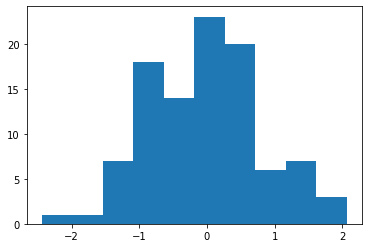

In [17]:
plt.hist(data["y_prediccion"]-data["y_actual"])

## Obteniendo la recta de regresión 

* y = a + b * x
* b = sum((xi - x_m)*(y_i-y_m))/sum((xi-x_m)^2)
* a = y_m - b * x_m

In [18]:
x_mean = np.mean(data["x"])
y_mean = np.mean(data["y_actual"])
x_mean, y_mean

(1.2244015827057546, 7.356707384987959)

In [19]:
data["beta_n"] = (data["x"]-x_mean)*(data["y_actual"]-y_mean)
data["beta_d"] = (data["x"]-x_mean)**2

In [20]:
beta = sum(data["beta_n"])/sum(data["beta_d"])

In [21]:
alpha = y_mean - beta * x_mean

In [22]:
alpha, beta

(5.027444297513359, 1.9023685695727843)

y = 5.03 + 1.89*x

In [23]:
data["y_model"] = alpha + beta * data["x"] 

In [24]:
data.head()

,x,y_actual,y_prediccion,SSR,SSD,SST,beta_n,beta_d,y_model
0,3.336319,12.605756,11.339006,15.858701,1.604655,27.552507,11.085556,4.460195,11.374353
1,4.128108,14.127541,12.843405,30.103848,1.649006,45.844187,19.660511,8.431510,12.880627
2,-1.809090,2.234599,1.562730,33.570178,0.451408,26.235999,15.537872,9.202069,1.585889
3,0.148071,5.378211,5.281334,4.307175,0.009385,3.914446,2.129517,1.158489,5.309129
4,-1.258617,1.198683,2.608628,22.544254,1.987947,37.921269,15.290488,6.165379,2.633092


In [25]:
SSR =sum((data["y_model"]-y_mean)**2)
SSD =sum((data["y_model"]-data["y_actual"])**2)
SST =sum((data["y_actual"]-y_mean)**2)

In [26]:
SSR, SSD, SST

(2246.3966718463294, 69.21315434927979, 2315.6098261956104)

In [27]:
R2 = SSR / SST
R2

0.9701101828268739

Text(0.5, 1.0, 'Valor Actual vs Predicción')

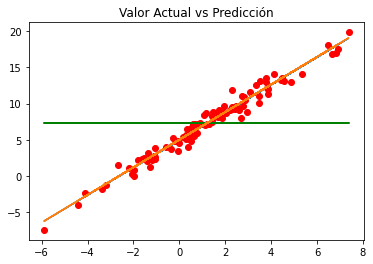

In [28]:
y_mean = [np.mean(y_act) for i in range(1, len(x_list) + 1)]

%matplotlib inline 
plt.plot(data["x"],data["y_prediccion"])
plt.plot(data["x"],data["y_actual"], "ro")
plt.plot(data["x"],y_mean, "g")
plt.plot(data["x"],data["y_model"])
plt.title("Valor Actual vs Predicción")

# Error estándar de los residuos(RSE)

In [31]:
RSE = np.sqrt(SSD/(len(data)-2))
RSE

0.8403907882845143

In [33]:
np.mean(data["y_actual"])

7.356707384987959

In [34]:
RSE / np.mean(data["y_actual"])

0.11423463572839791